In [5]:
import sys
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

from cdplot.scatter_cell import velocity_cell_map_curve as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [148]:
import importlib
importlib.reload(sys.modules['cdplot.scatter_cell'])
from cdplot.scatter_cell import velocity_cell_map_curve as vpl

In [107]:
load_cellDancer=pd.read_csv('/Users/pengzhizhang/pseudotime/data/Gastrulation/velocity_result/combined_detail_2000_genes_with_bin_and_smooth.csv')
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880


In [8]:
raw_data_path = "/Users/pengzhizhang/pseudotime/data/Gastrulation/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
load_raw_data = pd.read_csv(raw_data_path)

In [17]:
from _get_embedding import get_embedding
gene_choice=list(set(load_cellDancer.gene_name))
embedding, sampling_ixs, velocity_embedding = get_embedding(
    load_raw_data=load_raw_data,
    load_cellDancer=load_cellDancer,
    gene_list=gene_choice,
    mode="gene",
    n_neighbors=100,
    step=(60,60))

neighbors
tranfer mode: None
None
using gene mode
(2000, 12329)
(2000, 12329)


/Users/pengzhizhang/cellDancer/src/_get_embedding.py:47: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


[]
[]


In [171]:
velocity_embedding.shape

(432, 2)

In [104]:
n_cells = len(embedding)
index = np.hstack([sampling_ixs + n_cells*i for i in range(len(gene_choice))])

In [108]:
load_cellDancer.loc[index,'embedding_1'] = np.tile(embedding[sampling_ixs,0], len(gene_choice))
load_cellDancer.loc[index,'embedding_2'] = np.tile(embedding[sampling_ixs,1], len(gene_choice))
load_cellDancer.loc[index,'velocity_1'] = np.tile(velocity_embedding[:,0], len(gene_choice))
load_cellDancer.loc[index,'velocity_2'] = np.tile(velocity_embedding[:,1], len(gene_choice))

In [131]:
one_gene_raw = load_cellDancer.gene_name[0]
embedding = load_cellDancer[load_cellDancer.gene_name == one_gene_raw][['embedding_1', 'embedding_2']].dropna()
embedding = embedding.to_numpy()

In [167]:
velocity_embedding[[i for i in range(432)]*2]

array([[ 0.79723633, -0.44761079],
       [ 0.08265379,  0.12606084],
       [-0.16244032, -0.20949944],
       ...,
       [ 0.05164251, -0.64075287],
       [ 0.10480181,  0.02883113],
       [-0.11505971, -0.79625589]])

In [146]:
pip install bezier

     |████████████████████████████████| 1.7 MB 4.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


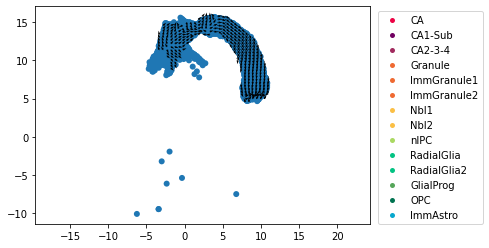

In [187]:
import importlib
importlib.reload(sys.modules['cdplot.scatter_cell'])
from cdplot.scatter_cell import velocity_cell_map_curve as vpl
vpl(load_cellDancer,
        save_path=None,
        custom_xlim=None,custom_ylim=None,
        colors=None, alpha=0.5,
        min_mass=2,grid_steps=(30,30))

In [175]:
velocity_embedding[np.array([[247,246,249, 273, 57,408], [247,246,249, 273, 57,408]])]

array([[[ 0.05737562, -0.01603903],
        [ 0.07731917, -0.02491604],
        [ 0.00408212, -0.06404011],
        [-0.06897163, -0.92305173],
        [-0.07693873,  0.15509134],
        [ 0.11637112, -1.05917809]],

       [[ 0.05737562, -0.01603903],
        [ 0.07731917, -0.02491604],
        [ 0.00408212, -0.06404011],
        [-0.06897163, -0.92305173],
        [-0.07693873,  0.15509134],
        [ 0.11637112, -1.05917809]]])

In [151]:
a = load_cellDancer[['embedding_1', 'embedding_2']].to_numpy()
a

array([[       nan,        nan],
       [       nan,        nan],
       [       nan,        nan],
       ...,
       [       nan,        nan],
       [9.99049534, 7.2438804 ],
       [       nan,        nan]])

------n_neighbors10
------add_amt_gene2000
neighbors
tranfer mode: power10
using gene mode
(2000, 12329)
(2000, 12329)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


4.1930088182233645
0.6906665710493576
0.16471860685043885


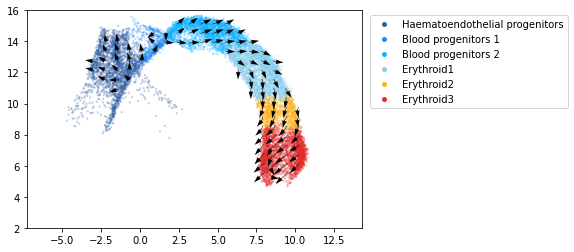

In [9]:
vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors=10,add_amt_gene=2000, save_path=output_path, save_csv=True, gene_list=None, colors=colormap_erythroid,step=(100,100),mode='gene',pca_n_components=None,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode='power10',umap_n_components=umap_n_components,min_mass=15,grid_steps=(20, 20),custom_xlim=[-6,13],custom_ylim=[2,16],alpha_inside=0.3,use_downsampling= True)